
# Weather Pattern

created on Monday July 9, 2018
@author: Benjamin O. Tayo

This code performs the following:

1. It returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day of the year.
2. Overlays a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

Dataset: The NOAA dataset used for this project is stored in the file `weather_data.csv`. This data comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.The data was collected from data stations near **Ann Arbor, Michigan, United States**.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)




## Import necessary libraries and dataset

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('weather_data.csv')

In [20]:
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


## Data preparation and analysis

In [21]:
#convert temperature from tenths of degree C to degree C
df['Data_Value']=0.1*df.Data_Value

In [22]:
days=list(map(lambda x: x.split('-')[-2]+'-'+x.split('-')[-1], df.Date))
years=list(map(lambda x: x.split('-')[0], df.Date))

In [23]:
df['Days']=days
df['Years']=years

In [24]:
df_2005_to_2014=df[(df.Days!='02-29')&(df.Years!='2015')]
df_2015=df[(df.Days!='02-29')&(df.Years=='2015')]


In [25]:
df_max=df_2005_to_2014.groupby(['Element','Days']).max()
df_min = df_2005_to_2014.groupby(['Element','Days']).min()
df_2015_max=df_2015.groupby(['Element','Days']).max()
df_2015_min = df_2015.groupby(['Element','Days']).min()

In [26]:
record_max=df_max.loc['TMAX'].Data_Value
record_min=df_min.loc['TMIN'].Data_Value
record_2015_max=df_2015_max.loc['TMAX'].Data_Value
record_2015_min=df_2015_min.loc['TMIN'].Data_Value

## Generate Data Visualization

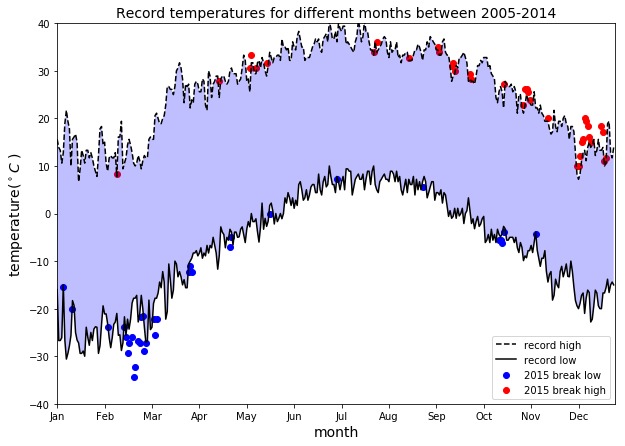

In [33]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(len(record_max)),record_max, '--k', label="record high")
plt.plot(np.arange(len(record_max)),record_min, '-k',label="record low")
plt.scatter(np.where(record_2015_min < record_min.values),
            record_2015_min[record_2015_min < record_min].values,c='b',label='2015 break low')
plt.scatter(np.where(record_2015_max > record_max.values),
            record_2015_max[record_2015_max > record_max].values,c='r',label='2015 break high')
plt.xlabel('month',size=14)
plt.ylabel('temperature($^\circ C$ )',size=14)
plt.xticks(np.arange(0,365,31), ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax=plt.gca()
ax.axis([0,365,-40,40])
plt.gca().fill_between(np.arange(0,365), 
                       record_min, record_max, 
                       facecolor='blue', 
                       alpha=0.25)
plt.title('Record temperatures for different months between 2005-2014',size=14)
plt.legend(loc=0)

plt.show()